In [1]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the pre processed dataset
combined_df = pd.read_csv('Dataset/combined_df.csv')
combined_df

,HCHO,Location,Current date,Next date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000197,"Deniyaya, Matara",2019-01-01,2019-01-02
2,0.000197,Nuwara Eliya Proper,2019-01-01,2019-01-02
3,0.000088,"Bibile, Monaragala",2019-01-01,2019-01-02
4,0.000088,Kurunegala Proper,2019-01-01,2019-01-02
...,...,...,...,...
12777,0.000080,Nuwara Eliya Proper,2023-12-31,2024-01-01
12778,0.000065,"Bibile, Monaragala",2023-12-31,2024-01-01
12779,0.000065,Kurunegala Proper,2023-12-31,2024-01-01
12780,0.000065,Jaffna Proper,2023-12-31,2024-01-01


In [3]:
# set 'Current Date' as index
combined_df['Current date'] = pd.to_datetime(combined_df['Current date'])
combined_df.set_index('Current date', inplace=True)

combined_df.head()

,HCHO,Location,Next date
Current date,,,
2019-01-01,0.000197,Colombo Proper,2019-01-02
2019-01-01,0.000197,"Deniyaya, Matara",2019-01-02
2019-01-01,0.000197,Nuwara Eliya Proper,2019-01-02
2019-01-01,0.000088,"Bibile, Monaragala",2019-01-02
2019-01-01,0.000088,Kurunegala Proper,2019-01-02


In [4]:
combined_df.index

DatetimeIndex(['2019-01-01', '2019-01-01', '2019-01-01', '2019-01-01',
               '2019-01-01', '2019-01-01', '2019-01-01', '2019-01-02',
               '2019-01-02', '2019-01-02',
               ...
               '2023-12-30', '2023-12-30', '2023-12-30', '2023-12-31',
               '2023-12-31', '2023-12-31', '2023-12-31', '2023-12-31',
               '2023-12-31', '2023-12-31'],
              dtype='datetime64[ns]', name='Current date', length=12782, freq=None)

In [5]:
# check stationarity
from statsmodels.tsa.stattools import adfuller

result = adfuller(combined_df['HCHO'])

print('ADF Statistics: %f' %result[0])
print('p-value: %f' %result[1])

# Based on the p-value, decide on stationarity
if result[1] > 0.05:
    print("The series is likely non-stationary and may need differencing.")
else:
    print("The series is likely stationary.")

ADF Statistics: -12.933627
p-value: 0.000000
The series is likely stationary.


<function matplotlib.pyplot.show(close=None, block=None)>

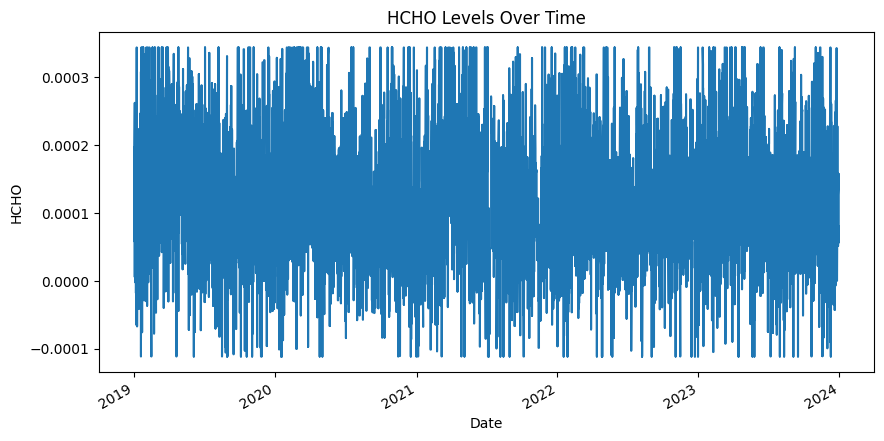

In [6]:
import matplotlib.pyplot as plt

combined_df['HCHO'].plot(figsize=(10,5))
plt.title('HCHO Levels Over Time')
plt.xlabel('Date')
plt.ylabel('HCHO')
plt.show

<Figure size 1200x600 with 0 Axes>

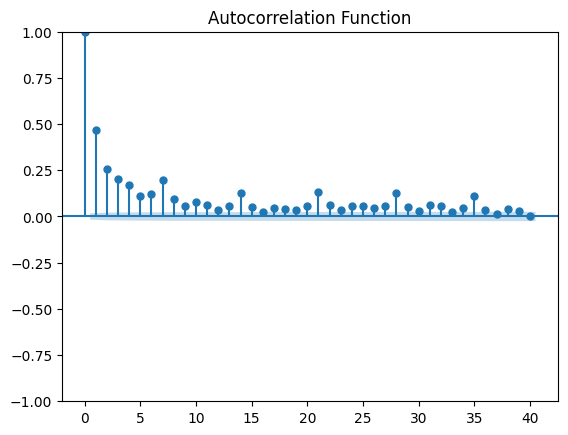

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF Plot
plt.figure(figsize=(12,6))
plot_acf(combined_df['HCHO'], lags=40, alpha=0.05)
plt.title('Autocorrelation Function')
plt.show()

<Figure size 1200x600 with 0 Axes>

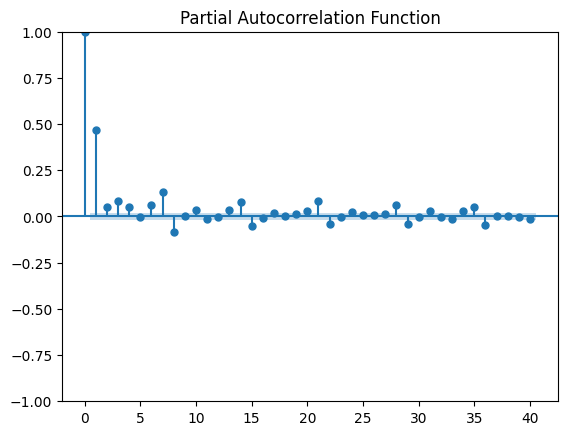

In [8]:
# PACF Plot
plt.figure(figsize=(12,6))
plot_pacf(combined_df['HCHO'], lags=40, alpha=0.05)
plt.title('Partial Autocorrelation Function')
plt.show()

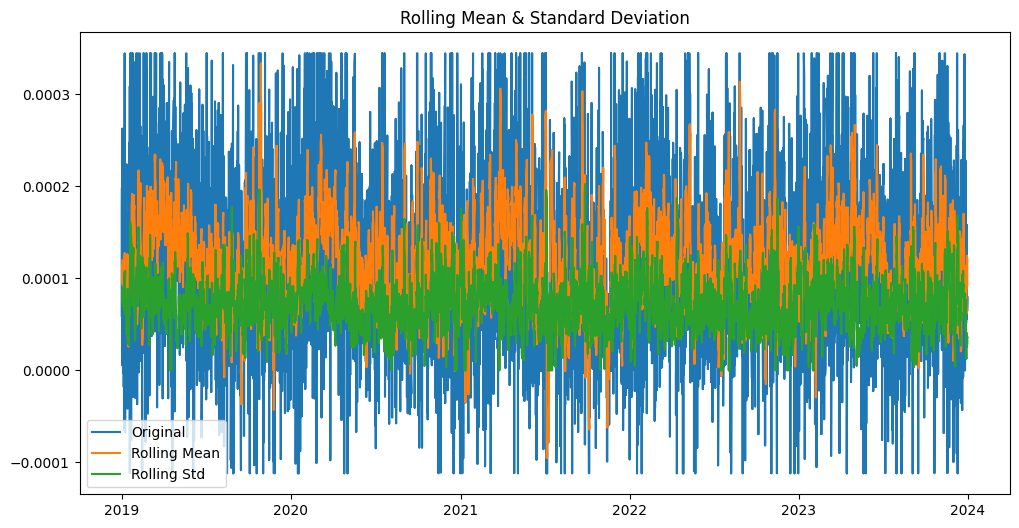

In [9]:
# Rolling Statistics Plot
rolling_mean = combined_df['HCHO'].rolling(window=12).mean()
rolling_std = combined_df['HCHO'].rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(combined_df['HCHO'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

### Bibile, Monaragala

In [10]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


In [11]:
#Splitting the dataset into train and test sets
split_ratio = 0.8 # 80% of data to train

monaragala_data = combined_df[combined_df['Location'] == 'Bibile, Monaragala']
train_size = int(len(monaragala_data) * split_ratio)
train_data, test_data = monaragala_data[0:train_size], monaragala_data[train_size:]

print("Full Data Size:-", monaragala_data.shape)
print("Train Data Size :-", train_data.shape)
print("Test Data Size :-", test_data.shape)

Full Data Size:- (1826, 3)
Train Data Size :- (1460, 3)
Test Data Size :- (366, 3)


In [12]:
# Model training
sarima_model = SARIMAX(train_data['HCHO'], order=(1,1,1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# Forecasts for test data
forecast = sarima_result.forecast(steps=len(test_data))

# Evaluation metrics
mse = mean_squared_error(test_data["HCHO"], forecast)  # Mean Squared Error
rmse = mean_squared_error(test_data["HCHO"], forecast, squared=False) # Root Mean Squared Error
mae = mean_absolute_error(test_data["HCHO"], forecast)  # Mean Absolute Error

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

MSE: 1.6796953349658348e-07
RMSE: 0.00040984086362463114
MAE: 0.00036051265156532004


In [13]:
# Model training
sarima_model = SARIMAX(monaragala_data['HCHO'], order=(1,1,1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# Forecasts for test data
forecast = sarima_result.forecast(steps=30)

print(forecast)

2024-01-01    0.000081
2024-01-02    0.000094
2024-01-03    0.000039
2024-01-04    0.000139
2024-01-05    0.000042
2024-01-06    0.000061
2024-01-07    0.000167
2024-01-08    0.000093
2024-01-09    0.000084
2024-01-10    0.000030
2024-01-11    0.000090
2024-01-12    0.000140
2024-01-13    0.000039
2024-01-14    0.000058
2024-01-15    0.000071
2024-01-16    0.000137
2024-01-17    0.000044
2024-01-18    0.000047
2024-01-19    0.000158
2024-01-20    0.000083
2024-01-21    0.000069
2024-01-22    0.000054
2024-01-23    0.000105
2024-01-24    0.000113
2024-01-25    0.000047
2024-01-26    0.000064
2024-01-27    0.000057
2024-01-28    0.000133
2024-01-29    0.000038
2024-01-30    0.000047
Freq: D, Name: predicted_mean, dtype: float64


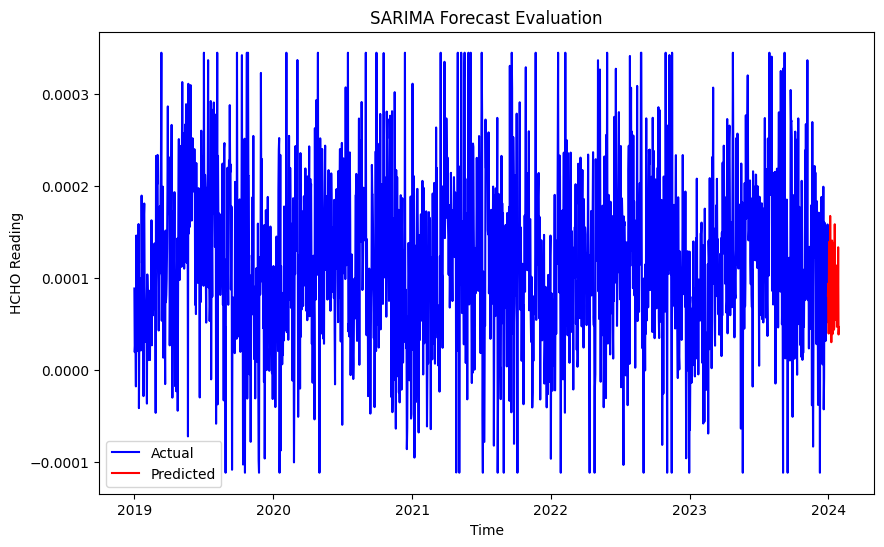

In [14]:
import matplotlib.pyplot as plt

# Plotting the predicted values and actual values
plt.figure(figsize=(10, 6))
plt.plot(monaragala_data.index, monaragala_data['HCHO'], label='Actual', color='blue')
forecast_range = pd.date_range(start=monaragala_data.index[-1], periods=30)
plt.plot(forecast_range, forecast, label='Predicted', color='red')
plt.xlabel('Time')
plt.ylabel('HCHO Reading')
plt.title('SARIMA Forecast Evaluation')
plt.legend()
plt.show()


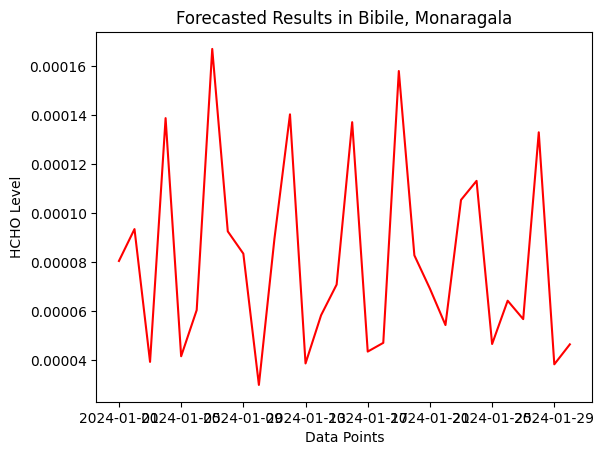

In [15]:
# Forecasted Results
plt.title("Forecasted Results in Bibile, Monaragala")
plt.xlabel('Data Points')
plt.ylabel('HCHO Level')
plt.plot(forecast, color='red')

### Colombo

In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


In [17]:
#Splitting the dataset into train and test sets
split_ratio = 0.8 # 80% of data to train

colombo_data = combined_df[combined_df['Location'] == 'Colombo Proper']
train_size = int(len(colombo_data) * split_ratio)
train_data, test_data = colombo_data[0:train_size], colombo_data[train_size:]

print("Full Data Size:-", colombo_data.shape)
print("Train Data Size :-", train_data.shape)
print("Test Data Size :-", test_data.shape)

Full Data Size:- (1826, 3)
Train Data Size :- (1460, 3)
Test Data Size :- (366, 3)


In [18]:
# Model training
sarima_model = SARIMAX(train_data['HCHO'], order=(1,1,1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# Forecasts for test data
forecast = sarima_result.forecast(steps=len(test_data))

# Evaluation metrics
mse = mean_squared_error(test_data["HCHO"], forecast)  # Mean Squared Error
rmse = mean_squared_error(test_data["HCHO"], forecast, squared=False) # Root Mean Squared Error
mae = mean_absolute_error(test_data["HCHO"], forecast)  # Mean Absolute Error

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

MSE: 1.3337234371025262e-07
RMSE: 0.00036520178492205184
MAE: 0.0003142697056609586


In [19]:
# Model training
sarima_model = SARIMAX(colombo_data['HCHO'], order=(1,1,1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# Forecasts for test data
forecast = sarima_result.forecast(steps=30)

print(forecast)

2024-01-01    0.000155
2024-01-02    0.000224
2024-01-03    0.000113
2024-01-04    0.000191
2024-01-05    0.000061
2024-01-06    0.000149
2024-01-07    0.000017
2024-01-08    0.000116
2024-01-09    0.000085
2024-01-10    0.000007
2024-01-11    0.000106
2024-01-12    0.000130
2024-01-13    0.000121
2024-01-14    0.000189
2024-01-15    0.000135
2024-01-16    0.000192
2024-01-17    0.000078
2024-01-18    0.000192
2024-01-19    0.000006
2024-01-20    0.000091
2024-01-21    0.000056
2024-01-22   -0.000002
2024-01-23    0.000093
2024-01-24    0.000087
2024-01-25    0.000107
2024-01-26    0.000176
2024-01-27    0.000102
2024-01-28    0.000167
2024-01-29    0.000047
2024-01-30    0.000152
Freq: D, Name: predicted_mean, dtype: float64


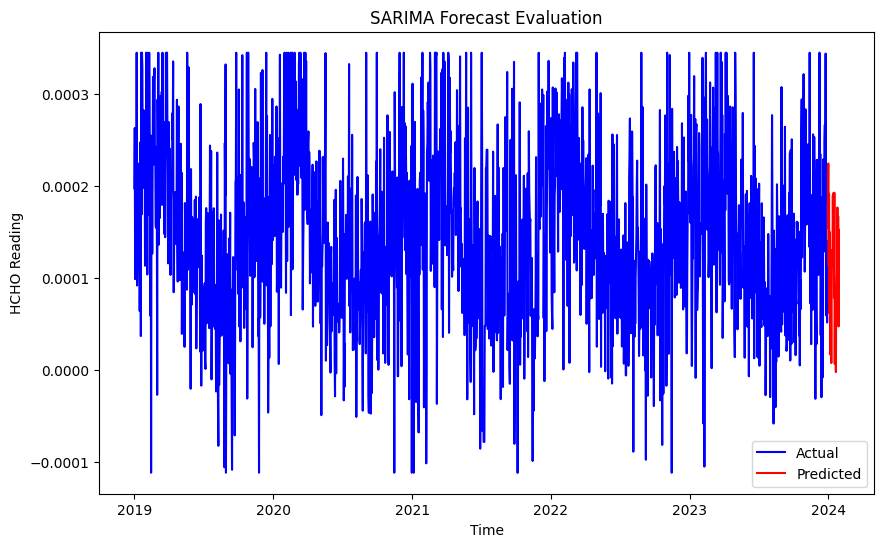

In [20]:
import matplotlib.pyplot as plt

# Plotting the predicted values and actual values
plt.figure(figsize=(10, 6))
plt.plot(colombo_data.index, colombo_data['HCHO'], label='Actual', color='blue')
forecast_range = pd.date_range(start=colombo_data.index[-1], periods=30)
plt.plot(forecast_range, forecast, label='Predicted', color='red')
plt.xlabel('Time')
plt.ylabel('HCHO Reading')
plt.title('SARIMA Forecast Evaluation')
plt.legend()
plt.show()


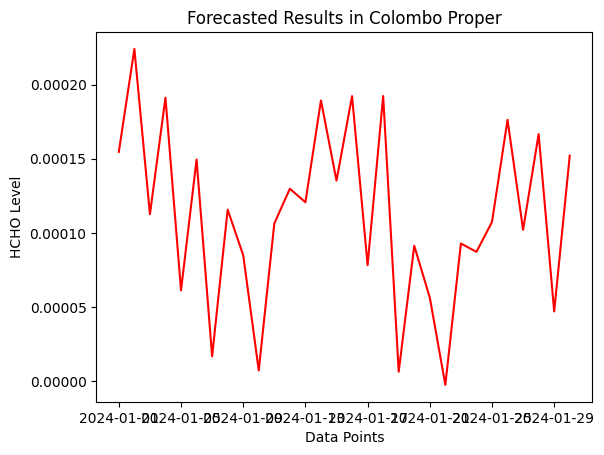

In [21]:
# Forecasted Results
plt.title("Forecasted Results in Colombo Proper")
plt.xlabel('Data Points')
plt.ylabel('HCHO Level')
plt.plot(forecast, color='red')

### Jaffna

In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


In [23]:
#Splitting the dataset into train and test sets
split_ratio = 0.8 # 80% of data to train

jaffna_data = combined_df[combined_df['Location'] == 'Jaffna Proper']
train_size = int(len(jaffna_data) * split_ratio)
train_data, test_data = jaffna_data[0:train_size], jaffna_data[train_size:]

print("Full Data Size:-", jaffna_data.shape)
print("Train Data Size :-", train_data.shape)
print("Test Data Size :-", test_data.shape)

Full Data Size:- (1826, 3)
Train Data Size :- (1460, 3)
Test Data Size :- (366, 3)


In [24]:
# Model training
sarima_model = SARIMAX(train_data['HCHO'], order=(1,1,1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# Forecasts for test data
forecast = sarima_result.forecast(steps=len(test_data))

# Evaluation metrics
mse = mean_squared_error(test_data["HCHO"], forecast)  # Mean Squared Error
rmse = mean_squared_error(test_data["HCHO"], forecast, squared=False) # Root Mean Squared Error
mae = mean_absolute_error(test_data["HCHO"], forecast)  # Mean Absolute Error

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

MSE: 1.865225680220123e-08
RMSE: 0.00013657326532744697
MAE: 0.00011198352097043276


In [25]:
# Model training
sarima_model = SARIMAX(jaffna_data['HCHO'], order=(1,1,1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# Forecasts for test data
forecast = sarima_result.forecast(steps=30)

print(forecast)

2024-01-01    0.000040
2024-01-02    0.000083
2024-01-03    0.000034
2024-01-04    0.000101
2024-01-05    0.000027
2024-01-06    0.000017
2024-01-07    0.000116
2024-01-08    0.000103
2024-01-09    0.000031
2024-01-10    0.000061
2024-01-11    0.000081
2024-01-12    0.000102
2024-01-13    0.000009
2024-01-14    0.000084
2024-01-15    0.000061
2024-01-16    0.000082
2024-01-17    0.000035
2024-01-18    0.000030
2024-01-19    0.000075
2024-01-20    0.000087
2024-01-21    0.000028
2024-01-22    0.000071
2024-01-23    0.000083
2024-01-24    0.000083
2024-01-25    0.000009
2024-01-26    0.000075
2024-01-27    0.000045
2024-01-28    0.000079
2024-01-29    0.000024
2024-01-30    0.000018
Freq: D, Name: predicted_mean, dtype: float64


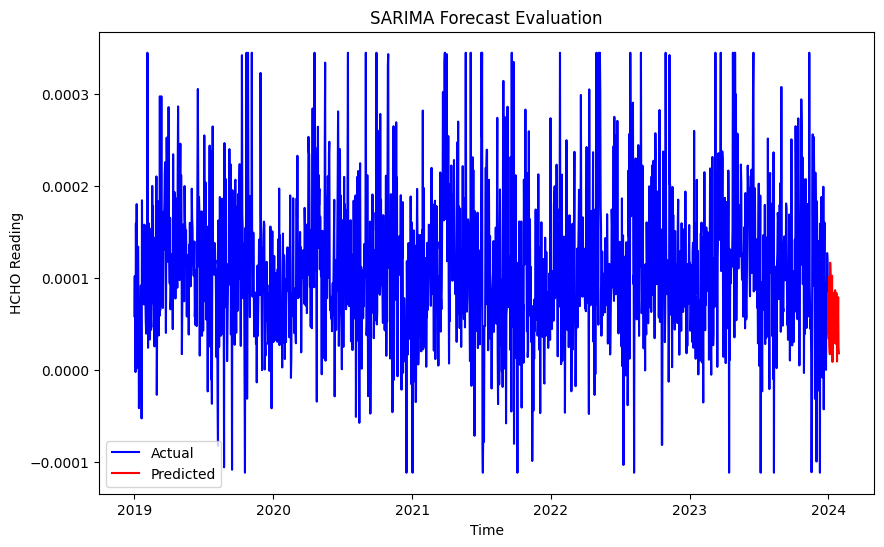

In [26]:
import matplotlib.pyplot as plt

# Plotting the predicted values and actual values
plt.figure(figsize=(10, 6))
plt.plot(jaffna_data.index, jaffna_data['HCHO'], label='Actual', color='blue')
forecast_range = pd.date_range(start=jaffna_data.index[-1], periods=30)
plt.plot(forecast_range, forecast, label='Predicted', color='red')
plt.xlabel('Time')
plt.ylabel('HCHO Reading')
plt.title('SARIMA Forecast Evaluation')
plt.legend()
plt.show()


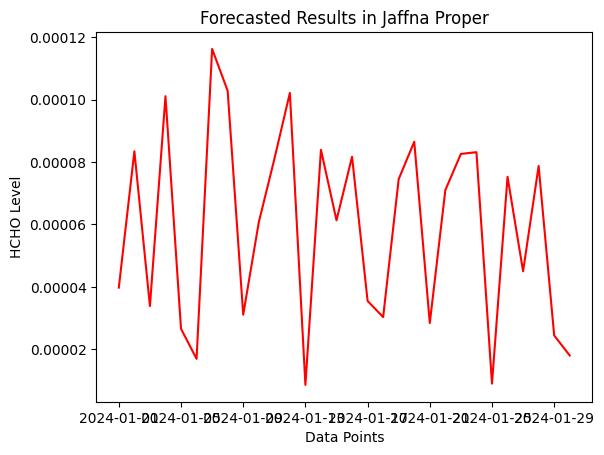

In [27]:
# Forecasted Results
plt.title("Forecasted Results in Jaffna Proper")
plt.xlabel('Data Points')
plt.ylabel('HCHO Level')
plt.plot(forecast, color='red')

### Deniyaya, Matara

In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


In [29]:
#Splitting the dataset into train and test sets
split_ratio = 0.8 # 80% of data to train

matara_data = combined_df[combined_df['Location'] == 'Deniyaya, Matara']
train_size = int(len(matara_data) * split_ratio)
train_data, test_data = matara_data[0:train_size], matara_data[train_size:]

print("Full Data Size:-", matara_data.shape)
print("Train Data Size :-", train_data.shape)
print("Test Data Size :-", test_data.shape)

Full Data Size:- (1826, 3)
Train Data Size :- (1460, 3)
Test Data Size :- (366, 3)


In [30]:
# Model training
sarima_model = SARIMAX(train_data['HCHO'], order=(1,1,1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# Forecasts for test data
forecast = sarima_result.forecast(steps=len(test_data))

# Evaluation metrics
mse = mean_squared_error(test_data["HCHO"], forecast)  # Mean Squared Error
rmse = mean_squared_error(test_data["HCHO"], forecast, squared=False) # Root Mean Squared Error
mae = mean_absolute_error(test_data["HCHO"], forecast)  # Mean Absolute Error

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

MSE: 2.0870677364679247e-07
RMSE: 0.00045684436479701977
MAE: 0.00040484597903267473


In [31]:
# Model training
sarima_model = SARIMAX(matara_data['HCHO'], order=(1,1,1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# Forecasts for test data
forecast = sarima_result.forecast(steps=30)

print(forecast)

2024-01-01    0.000157
2024-01-02    0.000169
2024-01-03    0.000012
2024-01-04    0.000087
2024-01-05    0.000037
2024-01-06    0.000025
2024-01-07    0.000041
2024-01-08    0.000130
2024-01-09    0.000079
2024-01-10    0.000033
2024-01-11    0.000116
2024-01-12    0.000063
2024-01-13    0.000139
2024-01-14    0.000112
2024-01-15    0.000080
2024-01-16    0.000067
2024-01-17    0.000036
2024-01-18    0.000031
2024-01-19    0.000037
2024-01-20    0.000152
2024-01-21    0.000069
2024-01-22    0.000030
2024-01-23    0.000106
2024-01-24    0.000059
2024-01-25    0.000136
2024-01-26    0.000121
2024-01-27    0.000049
2024-01-28    0.000064
2024-01-29    0.000027
2024-01-30    0.000019
Freq: D, Name: predicted_mean, dtype: float64


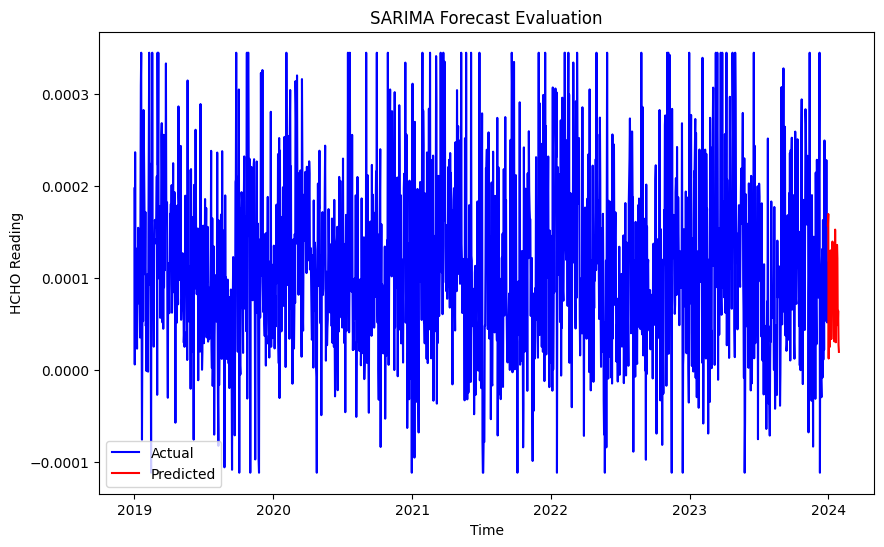

In [32]:
import matplotlib.pyplot as plt

# Plotting the predicted values and actual values
plt.figure(figsize=(10, 6))
plt.plot(matara_data.index, matara_data['HCHO'], label='Actual', color='blue')
forecast_range = pd.date_range(start=matara_data.index[-1], periods=30)
plt.plot(forecast_range, forecast, label='Predicted', color='red')
plt.xlabel('Time')
plt.ylabel('HCHO Reading')
plt.title('SARIMA Forecast Evaluation')
plt.legend()
plt.show()


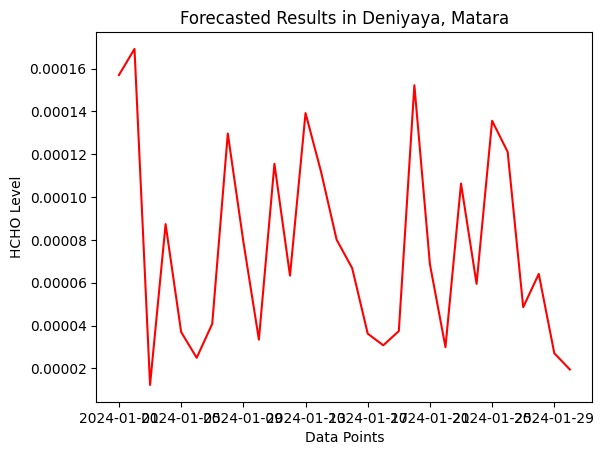

In [33]:
# Forecasted Results
plt.title("Forecasted Results in Deniyaya, Matara")
plt.xlabel('Data Points')
plt.ylabel('HCHO Level')
plt.plot(forecast, color='red')

### Kandy

In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


In [35]:
#Splitting the dataset into train and test sets
split_ratio = 0.8 # 80% of data to train

kandy_data = combined_df[combined_df['Location'] == 'Kandy Proper']
train_size = int(len(kandy_data) * split_ratio)
train_data, test_data = kandy_data[0:train_size], kandy_data[train_size:]

print("Full Data Size:-", kandy_data.shape)
print("Train Data Size :-", train_data.shape)
print("Test Data Size :-", test_data.shape)

Full Data Size:- (1826, 3)
Train Data Size :- (1460, 3)
Test Data Size :- (366, 3)


In [36]:
# Model training
sarima_model = SARIMAX(train_data['HCHO'], order=(1,1,1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# Forecasts for test data
forecast = sarima_result.forecast(steps=len(test_data))

# Evaluation metrics
mse = mean_squared_error(test_data["HCHO"], forecast)  # Mean Squared Error
rmse = mean_squared_error(test_data["HCHO"], forecast, squared=False) # Root Mean Squared Error
mae = mean_absolute_error(test_data["HCHO"], forecast)  # Mean Absolute Error

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

MSE: 6.092272602735443e-07
RMSE: 0.0007805301149049563
MAE: 0.0006920063822271161


In [37]:
# Model training
sarima_model = SARIMAX(kandy_data['HCHO'], order=(1,1,1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# Forecasts for test data
forecast = sarima_result.forecast(steps=30)

print(forecast)

2024-01-01    0.000006
2024-01-02    0.000069
2024-01-03    0.000116
2024-01-04    0.000145
2024-01-05   -0.000006
2024-01-06   -0.000022
2024-01-07    0.000091
2024-01-08    0.000076
2024-01-09    0.000006
2024-01-10    0.000013
2024-01-11    0.000115
2024-01-12    0.000090
2024-01-13    0.000042
2024-01-14    0.000059
2024-01-15    0.000055
2024-01-16    0.000112
2024-01-17   -0.000001
2024-01-18   -0.000010
2024-01-19    0.000039
2024-01-20    0.000052
2024-01-21   -0.000004
2024-01-22    0.000024
2024-01-23    0.000073
2024-01-24    0.000059
2024-01-25    0.000007
2024-01-26    0.000039
2024-01-27    0.000050
2024-01-28    0.000099
2024-01-29   -0.000026
2024-01-30   -0.000038
Freq: D, Name: predicted_mean, dtype: float64


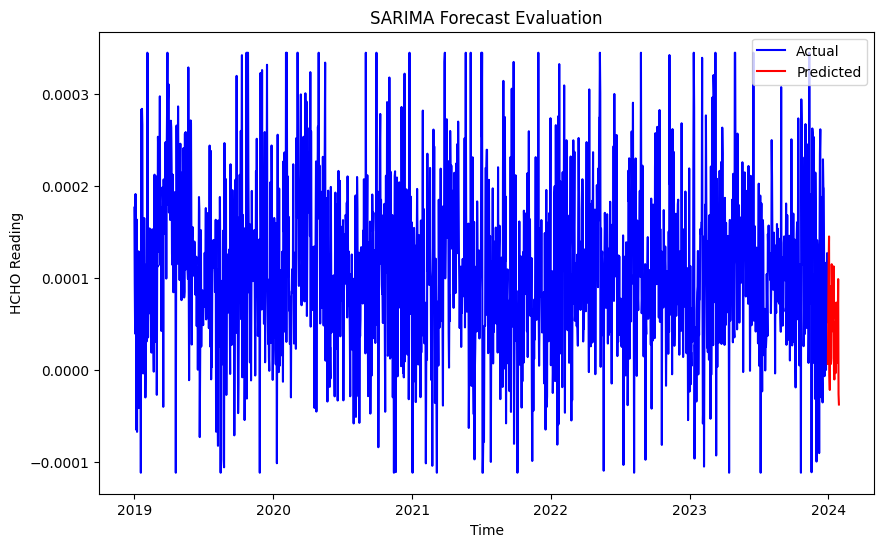

In [38]:
import matplotlib.pyplot as plt

# Plotting the predicted values and actual values
plt.figure(figsize=(10, 6))
plt.plot(kandy_data.index, kandy_data['HCHO'], label='Actual', color='blue')
forecast_range = pd.date_range(start=kandy_data.index[-1], periods=30)
plt.plot(forecast_range, forecast, label='Predicted', color='red')
plt.xlabel('Time')
plt.ylabel('HCHO Reading')
plt.title('SARIMA Forecast Evaluation')
plt.legend()
plt.show()


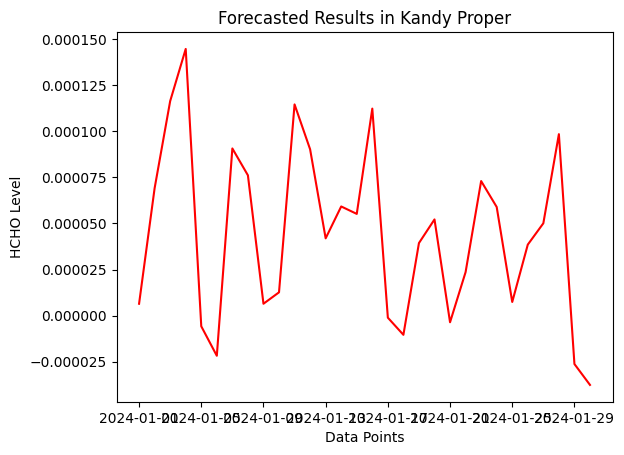

In [39]:
# Forecasted Results
plt.title("Forecasted Results in Kandy Proper")
plt.xlabel('Data Points')
plt.ylabel('HCHO Level')
plt.plot(forecast, color='red')

### Kurunegala

In [40]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


In [41]:
#Splitting the dataset into train and test sets
split_ratio = 0.8 # 80% of data to train

kurunegala_data = combined_df[combined_df['Location'] == 'Kurunegala Proper']
train_size = int(len(kurunegala_data) * split_ratio)
train_data, test_data = kurunegala_data[0:train_size], kurunegala_data[train_size:]

print("Full Data Size:-", kurunegala_data.shape)
print("Train Data Size :-", train_data.shape)
print("Test Data Size :-", test_data.shape)

Full Data Size:- (1826, 3)
Train Data Size :- (1460, 3)
Test Data Size :- (366, 3)


In [42]:
# Model training
sarima_model = SARIMAX(train_data['HCHO'], order=(1,1,1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# Forecasts for test data
forecast = sarima_result.forecast(steps=len(test_data))

# Evaluation metrics
mse = mean_squared_error(test_data["HCHO"], forecast)  # Mean Squared Error
rmse = mean_squared_error(test_data["HCHO"], forecast, squared=False) # Root Mean Squared Error
mae = mean_absolute_error(test_data["HCHO"], forecast)  # Mean Absolute Error

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

MSE: 1.0702854698598313e-08
RMSE: 0.00010345460211415591
MAE: 8.277757393169253e-05


In [43]:
# Model training
sarima_model = SARIMAX(kurunegala_data['HCHO'], order=(1,1,1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# Forecasts for test data
forecast = sarima_result.forecast(steps=30)

print(forecast)

2024-01-01    0.000065
2024-01-02    0.000081
2024-01-03    0.000030
2024-01-04    0.000129
2024-01-05    0.000057
2024-01-06    0.000034
2024-01-07    0.000163
2024-01-08    0.000087
2024-01-09    0.000035
2024-01-10    0.000030
2024-01-11    0.000083
2024-01-12    0.000142
2024-01-13    0.000026
2024-01-14    0.000082
2024-01-15    0.000060
2024-01-16    0.000100
2024-01-17    0.000057
2024-01-18    0.000043
2024-01-19    0.000151
2024-01-20    0.000074
2024-01-21    0.000031
2024-01-22    0.000050
2024-01-23    0.000096
2024-01-24    0.000109
2024-01-25    0.000029
2024-01-26    0.000072
2024-01-27    0.000041
2024-01-28    0.000099
2024-01-29    0.000047
2024-01-30    0.000031
Freq: D, Name: predicted_mean, dtype: float64


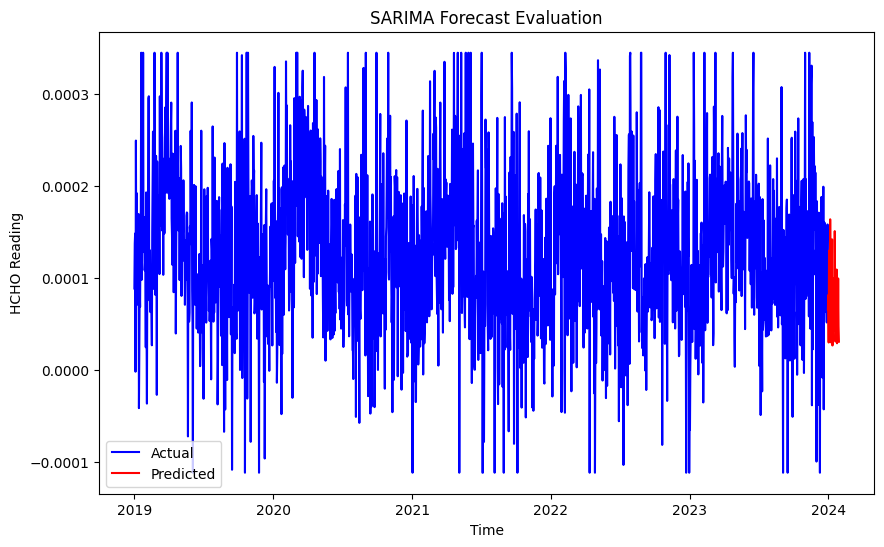

In [44]:
import matplotlib.pyplot as plt

# Plotting the predicted values and actual values
plt.figure(figsize=(10, 6))
plt.plot(kurunegala_data.index, kurunegala_data['HCHO'], label='Actual', color='blue')
forecast_range = pd.date_range(start=kurunegala_data.index[-1], periods=30)
plt.plot(forecast_range, forecast, label='Predicted', color='red')
plt.xlabel('Time')
plt.ylabel('HCHO Reading')
plt.title('SARIMA Forecast Evaluation')
plt.legend()
plt.show()


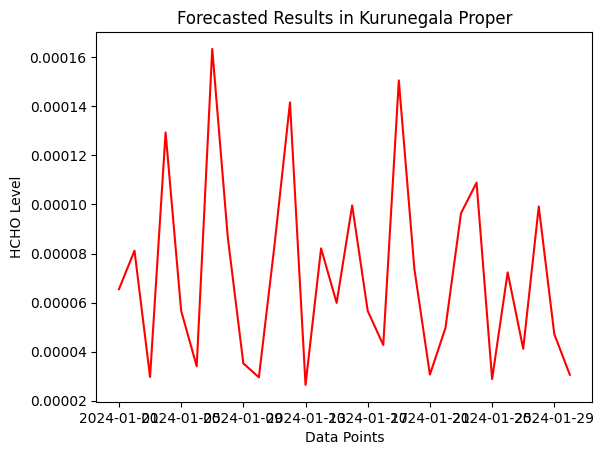

In [45]:
# Forecasted Results
plt.title("Forecasted Results in Kurunegala Proper")
plt.xlabel('Data Points')
plt.ylabel('HCHO Level')
plt.plot(forecast, color='red')

### Nuwara Eliya

In [46]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


In [47]:
#Splitting the dataset into train and test sets
split_ratio = 0.8 # 80% of data to train

nuwara_eliya_data = combined_df[combined_df['Location'] == 'Nuwara Eliya Proper']
train_size = int(len(nuwara_eliya_data) * split_ratio)
train_data, test_data = nuwara_eliya_data[0:train_size], nuwara_eliya_data[train_size:]

print("Full Data Size:-", nuwara_eliya_data.shape)
print("Train Data Size :-", train_data.shape)
print("Test Data Size :-", test_data.shape)

Full Data Size:- (1826, 3)
Train Data Size :- (1460, 3)
Test Data Size :- (366, 3)


In [48]:
# Model training
sarima_model = SARIMAX(train_data['HCHO'], order=(1,1,1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# Forecasts for test data
forecast = sarima_result.forecast(steps=len(test_data))

# Evaluation metrics
mse = mean_squared_error(test_data["HCHO"], forecast)  # Mean Squared Error
rmse = mean_squared_error(test_data["HCHO"], forecast, squared=False) # Root Mean Squared Error
mae = mean_absolute_error(test_data["HCHO"], forecast)  # Mean Absolute Error

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

MSE: 4.927961291291571e-08
RMSE: 0.00022199011895333474
MAE: 0.00019056843662669615


In [49]:
# Model training
sarima_model = SARIMAX(nuwara_eliya_data['HCHO'], order=(1,1,1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# Forecasts for test data
forecast = sarima_result.forecast(steps=30)

print(forecast)


2024-01-01    0.000133
2024-01-02    0.000116
2024-01-03    0.000057
2024-01-04    0.000176
2024-01-05    0.000069
2024-01-06    0.000094
2024-01-07    0.000163
2024-01-08    0.000171
2024-01-09    0.000108
2024-01-10    0.000061
2024-01-11    0.000106
2024-01-12    0.000091
2024-01-13    0.000146
2024-01-14    0.000100
2024-01-15    0.000127
2024-01-16    0.000207
2024-01-17    0.000080
2024-01-18    0.000100
2024-01-19    0.000144
2024-01-20    0.000201
2024-01-21    0.000103
2024-01-22    0.000094
2024-01-23    0.000122
2024-01-24    0.000101
2024-01-25    0.000154
2024-01-26    0.000118
2024-01-27    0.000119
2024-01-28    0.000210
2024-01-29    0.000089
2024-01-30    0.000110
Freq: D, Name: predicted_mean, dtype: float64


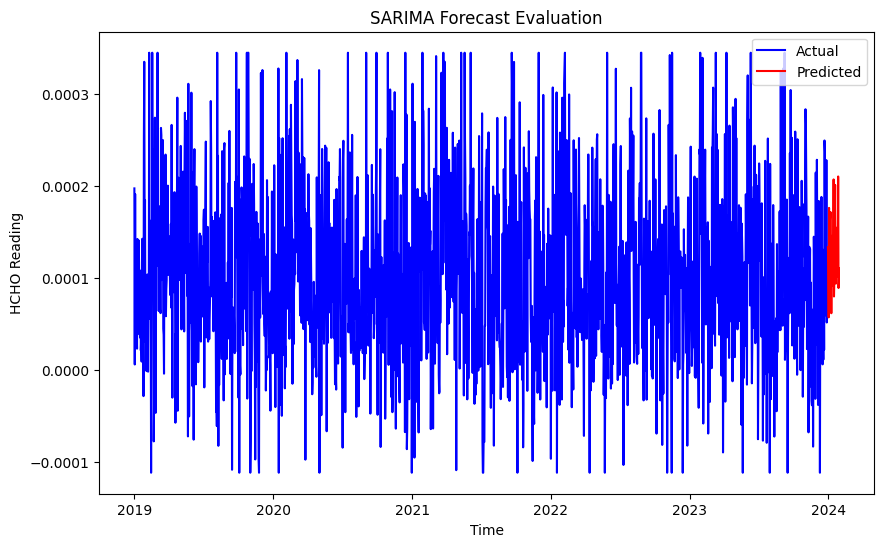

In [50]:
import matplotlib.pyplot as plt

# Plotting the predicted values and actual values
plt.figure(figsize=(10, 6))
plt.plot(nuwara_eliya_data.index, nuwara_eliya_data['HCHO'], label='Actual', color='blue')

forecast_range = pd.date_range(start=nuwara_eliya_data.index[-1], periods=30)

plt.plot(forecast_range, forecast, label='Predicted', color='red')
plt.xlabel('Time')
plt.ylabel('HCHO Reading')
plt.title('SARIMA Forecast Evaluation')
plt.legend()
plt.show()


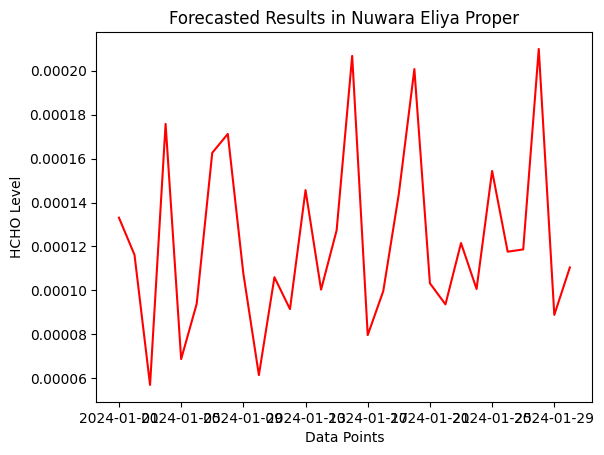

In [51]:
# Forecasted Results
plt.title("Forecasted Results in Nuwara Eliya Proper")
plt.xlabel('Data Points')
plt.ylabel('HCHO Level')
plt.plot(forecast, color='red')